In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import interferometer as ir
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import numpy as np

In [5]:
t1=widgets.FloatSlider(value = 10,min=-90, max=180,step=1)
t3=widgets.FloatSlider(value = -40,min=-90, max=180,step=1)
t2min=widgets.FloatSlider(value = 0.0,min=0, max=180,step=1)
t2max=widgets.FloatSlider(value = 125,min=0, max=180,step=1)
yvmax = widgets.FloatSlider(value = 0.2,min=0.001, max=1,step=0.001)
yhmax = widgets.FloatSlider(value = 0.2,min=0.001, max=1,step=0.001)
#ysmax = widgets.FloatSlider(value = 0.2,min=0.001, max=1,step=0.001)

def make_plots(t1,t3,t2min,t2max,yvmax,yhmax):
    ir.vertical(t1,t3,t2min,t2max,yvmax)
    ir.horizontal(t1,t3,t2min,t2max,yhmax)
    ir.split(t1,t3,t2min,t2max)

interact(make_plots, 
         t1=t1,
         t3= t3,
         t2min=t2min,
         t2max=t2max,
         yvmax = yvmax,
         yhmax = yhmax
         
        );

interactive(children=(FloatSlider(value=10.0, description='t1', max=180.0, min=-90.0, step=1.0), FloatSlider(v…

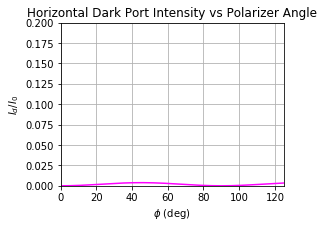

AttributeError: 'NoneType' object has no attribute 'savefig'

In [3]:
# Intesity going to darkport



theta1 = 10
theta3 = -40
theta2min=0
theta2max = 125


h = ir.horizontal(theta1,theta3,theta2min, theta2max)
"this plots the horizontal light coming out of the darkport"
h.savefig("horizontal_darkport.png",dpi=600,pad_inches= 0.25,bbox_inches="tight")
# Intensity going to brightport

v = ir.vertical(theta1,theta3,theta2min, theta2max)
"this plots the vertical light coming out of the darkport"
v.savefig("vertical_darkport.png",dpi=600,pad_inches=0.25,bbox_inches="tight")

s = ir.split(theta1,theta3,theta2min, theta2max)
"bright port minus dark ratio to total initial intensity"
s.savefig("difference_intensity.png", dpi=600,pad_inches=0.25,bbox_inches="tight")

In [ ]:
theta1 = 20
theta3 = -80
theta2min=0
theta2max = 150

# THIS IS A GOOD SLOPE FOR SPLIT!!! LOOK FOR THINGS LIKE THIS!
h = ir.horizontal(theta1,theta3,theta2min, theta2max)
"this plots the horizontal light coming out of the darkport"
h.savefig("horizontal_darkport.png",dpi=600,pad_inches= 0.25,bbox_inches="tight")
# Intensity going to brightport

v = ir.vertical(theta1,theta3,theta2min, theta2max)
"this plots the vertical light coming out of the darkport"
v.savefig("vertical_darkport.png",dpi=600,pad_inches=0.25,bbox_inches="tight")

s = ir.split(theta1,theta3,theta2min, theta2max)
"bright port minus dark ratio to total initial intensity"
s.savefig("difference_intensity.png", dpi=600,pad_inches=0.25,bbox_inches="tight")

In [ ]:
theta1 = -10
theta3 = 40
theta2min=0
theta2max = 175


h = ir.horizontal(theta1,theta3,theta2min, theta2max)
"this plots the horizontal light coming out of the darkport"
h.savefig("horizontal_darkport.png",dpi=600,pad_inches= 0.25,bbox_inches="tight")
# Intensity going to brightport

v = ir.vertical(theta1,theta3,theta2min, theta2max)
"this plots the vertical light coming out of the darkport"
v.savefig("vertical_darkport.png",dpi=600,pad_inches=0.25,bbox_inches="tight")

s = ir.split(theta1,theta3,theta2min, theta2max)
"bright port minus dark ratio to total initial intensity"
s.savefig("difference_intensity.png", dpi=600,pad_inches=0.25,bbox_inches="tight")

In [ ]:
theta1 = -80
theta3 = 90
theta2min=0
theta2max = 175

#ADJUST THETAMIN MAX AROUND INTERESTING PARTS! HOW DO THE ANGLES COORISPOND TO THE PATTERN IM SEEING GET INTUITION FOR IT

h = ir.horizontal(theta1,theta3,theta2min, theta2max)
"this plots the horizontal light coming out of the darkport"
h.savefig("horizontal_darkport.png",dpi=600,pad_inches= 0.25,bbox_inches="tight")
# Intesity going to brightport

v = ir.vertical(theta1,theta3,theta2min, theta2max)
"this plots the vertical light coming out of the darkport"
v.savefig("vertical_darkport.png",dpi=600,pad_inches=0.25,bbox_inches="tight")

s = ir.split(theta1,theta3,theta2min, theta2max)
"bright port minus dark ratio to total initial intensity"
s.savefig("difference_intensity.png", dpi=600,pad_inches=0.25,bbox_inches="tight")